In [1]:
#####import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
####reading the csv files

In [4]:
movies=pd.read_csv('movies.csv')
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [5]:
ratings=pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [6]:
###mergingfiles

In [7]:
data=pd.merge(ratings,movies,on='movieId')
data

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
...,...,...,...,...,...,...
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller


In [8]:
rating1=pd.DataFrame(data.groupby('title')['rating'].mean())
rating1

,rating
title,
'71 (2014),4.000000
'Hellboy': The Seeds of Creation (2004),4.000000
'Round Midnight (1986),3.500000
'Salem's Lot (2004),5.000000
'Til There Was You (1997),4.000000
...,...
eXistenZ (1999),3.863636
xXx (2002),2.770833
xXx: State of the Union (2005),2.000000


In [9]:
rating1['count']=data['title'].value_counts()
rating1

,rating,count
title,,
'71 (2014),4.000000,1
'Hellboy': The Seeds of Creation (2004),4.000000,1
'Round Midnight (1986),3.500000,2
'Salem's Lot (2004),5.000000,1
'Til There Was You (1997),4.000000,2
...,...,...
eXistenZ (1999),3.863636,22
xXx (2002),2.770833,24
xXx: State of the Union (2005),2.000000,5


In [10]:
####data visualization

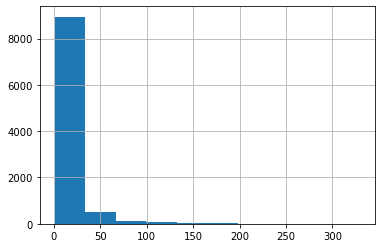

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
rating1['count'].hist()

In [12]:
pivot_df=data.pivot_table(index='userId',columns='title',values='rating')
pivot_df

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.5,3.5,NaN,NaN,NaN


In [14]:
import tkinter as tk
app=tk.Tk()
app.title('Movie recommandation system')
app.geometry('500x300')

tk.Label(app, text='movie:').place(x=30,y=25)
tk.Label(app, text='recommanded:').place(x=30,y=125)
tk.Label(app, text='try:').place(x=30,y=150)


movie_var =tk.Variable(app)
tk.Entry(app, textvariable=movie_var, width=30).place(x=100,y=25) 

recommanded_var =tk.Variable(app)
recommanded_var.set('type movie name ..')
tk.Label(app, textvariable=recommanded_var, width=30).place(x=100,y=125)

try_var =tk.Variable(app)
try_var.set('type movie name..')
tk.Label(app, textvariable=try_var, width=30).place(x=100,y=150)

def find_recommandation():
        movie=v=movie_var.get().lower().strip()
        try: 
            movie=movies['title'][movies['title'].apply(lambda x: movie in x.lower())].values[0]
            print(movie)
            movie_var.set(movie)
        except IndexError:
            recommanded_var.set('movie not found')
            try_var.set('movie not found')

        else:
            
            corr_df=pd.DataFrame( pivot_df.corrwith(pivot_df[movie]),columns= ['correlation'])
            corr_df.dropna(inplace=True)
            corr_df= corr_df.join(rating1['count'])
            corr_df[corr_df['count']>150].sort_values(by='correlation',ascending=False)
            recommanded_var .set(corr_df[(corr_df['count']>150)&(corr_df['correlation']>0.45)].sort_values(by='correlation',ascending=False).index[1])
            try_var .set(corr_df[corr_df['correlation']>0.45].sort_values(by='correlation',ascending=False).index[0])
                   

tk.Button(app,text='suggest',command=find_recommandation,bg='#ffffff',fg='blue').place(x=90,y=75)
    
app.mainloop()    


Jumanji (1995)


In [142]:
##### Find  the index of title###

In [54]:
movie='aladdin'
movies[movies['title'].apply(lambda x:movie in x.lower())]

,movieId,title,genres
506,588,Aladdin (1992),Adventure|Animation|Children|Comedy|Musical
812,1064,Aladdin and the King of Thieves (1996),Animation|Children|Comedy|Fantasy|Musical|Romance


In [55]:
movies[movies['title'].apply(lambda x:movie in x.lower())].values[0]

array([588, 'Aladdin (1992)',
       'Adventure|Animation|Children|Comedy|Musical'], dtype=object)